In [2]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!ls ~/.kaggle

In [4]:
!pip install split-folders

In [5]:
import tensorflow as tf
print(tf.__version__)
import zipfile,os
import splitfolders
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

2.17.0


In [6]:
# menyiapkan dataset yang akan digunakan
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset -p /tmp

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
100% 1.98G/1.98G [01:04<00:00, 38.9MB/s]
100% 1.98G/1.98G [01:04<00:00, 33.1MB/s]


In [7]:
# mengekstrak data
local_zip = '/tmp/emotion-recognition-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/emotion-recognition-dataset')
zip_ref.close()

In [8]:
# membagi folder menggunakan fungsi split
splitfolders.ratio('/tmp/emotion-recognition-dataset/dataset', output='/tmp/emotion-recognition-dataset/splited_data', seed=1327, ratio=(.6, .4))

Copying files: 15453 files [00:14, 1054.32 files/s]


In [9]:
base_dir = '/tmp/emotion-recognition-dataset/splited_data/'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [10]:
os.listdir('/tmp/emotion-recognition-dataset/splited_data/train')


['Surprise', 'Happy', 'Neutral', 'Ahegao', 'Angry', 'Sad']

In [11]:
os.listdir('/tmp/emotion-recognition-dataset/splited_data/val')

['Surprise', 'Happy', 'Neutral', 'Ahegao', 'Angry', 'Sad']

In [12]:
# augmentasi gambar pada sampel
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale  =1./255,
    rotation_range=20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
  )

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 9270 images belonging to 6 classes.
Found 6183 images belonging to 6 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,063,878 (4.06 MB)

 Trainable params: 1,063,878 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [17]:
# EarlyStopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# ReduceLROnPlateau callback
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# TensorBoard callback
tb = tf.keras.callbacks.TensorBoard(log_dir='tensorboard_logs')


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # meningkatkan jumlah steps
    epochs=50,            # meningkatkan jumlah epochs
    validation_data=validation_generator,
    validation_steps=20,  # meningkatkan jumlah validation steps
    verbose=2,
    callbacks=[es, lr_scheduler, tb]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 53s - 533ms/step - accuracy: 0.2431 - loss: 1.6644 - val_accuracy: 0.2656 - val_loss: 1.6398 - learning_rate: 0.0010
Epoch 2/50
100/100 - 38s - 383ms/step - accuracy: 0.2766 - loss: 1.5952 - val_accuracy: 0.3531 - val_loss: 1.4984 - learning_rate: 0.0010
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 - 41s - 408ms/step - accuracy: 0.3258 - loss: 1.5192 - val_accuracy: 0.3187 - val_loss: 1.5449 - learning_rate: 0.0010
Epoch 4/50
100/100 - 41s - 407ms/step - accuracy: 0.3391 - loss: 1.5000 - val_accuracy: 0.3531 - val_loss: 1.5256 - learning_rate: 0.0010
Epoch 5/50
100/100 - 38s - 378ms/step - accuracy: 0.3709 - loss: 1.4536 - val_accuracy: 0.3562 - val_loss: 1.5081 - learning_rate: 0.0010
Epoch 6/50
100/100 - 31s - 310ms/step - accuracy: 0.3686 - loss: 1.4336 - val_accuracy: 0.4094 - val_loss: 1.3954 - learning_rate: 0.0010
Epoch 7/50
100/100 - 40s - 399ms/step - accuracy: 0.4100 - loss: 1.3673 - val_accuracy: 0.4703 - val_loss: 1.3150 - learning_rate: 0.0010
Epoch 8/50
100/100 - 36s - 359ms/step - accuracy: 0.4966 - loss: 1.2232 - val_accuracy: 0.4766 - val_loss: 1.3008 - learning_rate: 0.0010
Epoch 9/50
100/100 - 33s - 327ms/step - accuracy: 0.5191 - loss: 1.1699 - val_accuracy: 0.5297 - val_loss: 1.1485 - learning_rate: 0.0010
Epoch 10/50
100/100 - 77s - 773ms/step - accu

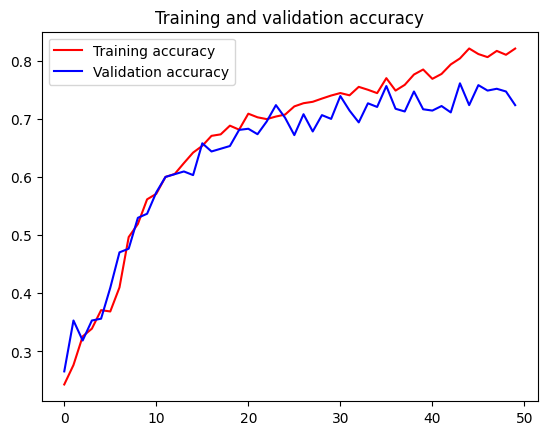

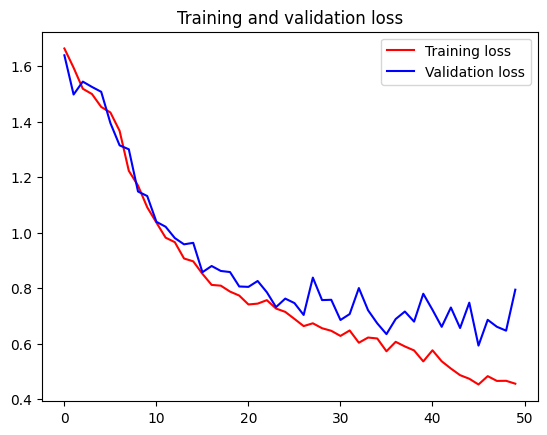

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model.save('model.h5')

# Mengunduh file model
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving Screenshot 2024-10-27 175521.png to Screenshot 2024-10-27 175521.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Screenshot 2024-10-27 175521.png
Sad


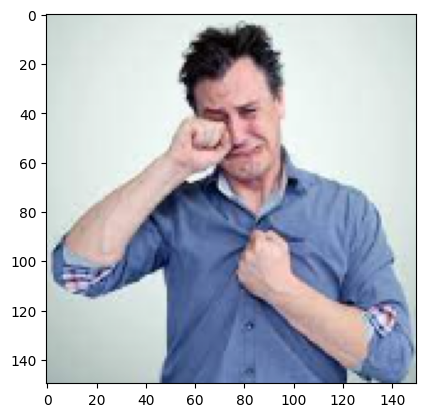

In [22]:
uploaded = files.upload()
#['Surprise', 'Happy', 'Neutral', 'Ahegao', 'Angry', 'Sad']
for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)
  print(fn)
  prediction = np.argmax(classes[0])

  if prediction == 0:
    print('Ahegao')
  elif prediction == 1:
    print('Angry')
  elif prediction == 2:
    print('Happy')
  elif prediction == 3:
    print('Neutral')
  elif prediction == 4:
    print('Sad')
  elif prediction == 4:
    print('Surprise')
  else :
    print('Tidak dikenali')